In [1]:
# import required libraries

import numpy as np 
import math
import matplotlib.pyplot as plt

# NumPy is a Python library used for working with arrays
# Python Math Library provides us access to some common math functions and constants in Python
# pyplot is a plotting library used for 2D graphics

In [2]:
# calculating the length of both links based on payload 
d= float(5) 
m= float(input('Enter payload in Kg: '))
L= float((50*math.pi*d*d*d)/(32*m*9.81)) 
L2= L/2.5
L1= 1.5*L2
print("")

print("Length of Link 1 is:  ", L1)
print("Length of Link 2 is:  ", L2)

Enter payload in Kg: 5

Length of Link 1 is:   7.505716393324239
Length of Link 2 is:   5.003810928882825


In [3]:
# define initial (fixed) position of robotic arm 

x0=0
y0=0

In [4]:
# to select the best path for robotic arm motion
# (based on minimum area to be swept)

def find_opt(val, initial_pos):
    swept_area=100000
    ans=val[0]
    for v in val:
        area=0
        start = min(v[1], initial_pos[1])
        end = max(v[1], initial_pos[1])
        area+=math.pi*L2*L2*(end-start)
        start = min(v[0], initial_pos[0])
        end = max(v[0], initial_pos[0])
        area+=math.pi*L1*L1*(end-start)
        print("Area for", v, "is", area)
        if(area<swept_area):
            swept_area=area
            ans=v
            
    return ans

In [5]:
xpick =float(input('Enter x coordinate of pick position:  '))
ypick =float(input('Enter y coordinate of pick position:  '))

if (((L1+L2)*(L1+L2)<(xpick*xpick)+(ypick*ypick)) or ((L1-L2)*(L1-L2)>(xpick*xpick)+(ypick*ypick))):
    print("")
    print("")
    print("Not possible to reach this position. Please re-enter the coordinates.")

Enter x coordinate of pick position:  4
Enter y coordinate of pick position:  5


In [6]:
xplace =float(input('Enter x coordinate of place position:  '))
yplace =float(input('Enter y coordinate of place position:  '))

if (((L1+L2)*(L1+L2)<(xplace*xplace)+(yplace*yplace)) or ((L1-L2)*(L1-L2)>(xplace*xplace)+(yplace*yplace))):
    print("")
    print("")
    print("Not possible to reach this position. Please re-enter the coordinates.")

Enter x coordinate of place position:  6
Enter y coordinate of place position:  9


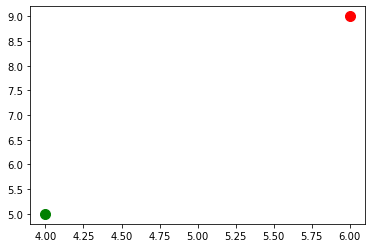

In [7]:
plt.scatter(xpick,ypick,s=100 ,color = 'green')
plt.scatter(xplace,yplace,s=100 ,color = 'red')

In [8]:
#to store plot numbers

figno=1

In [9]:
# movement of L1 link
# X1 = x1
# Y1 = y1
def print_L1_movement(theta, fixed_angle , check):
    global figno
    t2=fixed_angle
    for t1 in theta:
#     for t2 in theta2:
        x1=L1*math.cos(t1)
        y1=L1*math.sin(t1)
        x2=x1+L2*math.cos(t2)
        y2=y1+L2*math.sin(t2)
        
        filename=str(figno)+'.jpg'
        figno = figno+1

        plt.figure()
        plt.plot([x0,x1],[y0,y1])
        plt.plot([x1,x2],[y1,y2])
        plt.xlim([0,L1+L2+10])
        plt.ylim([0,L1+L2+10])
        if(check==0):
            plt.scatter(xpick,ypick,s=100,color = 'green')
            plt.scatter(xplace,yplace,s=100,color = 'red')
        if(check==1):
            plt.scatter(x2,y2,s=100,color = 'green')
            plt.scatter(xplace,yplace,s=100,color = 'red')
        plt.savefig(filename)
        

        
# movement of link 2
def print_L2_movement(theta, fixed_angle ,check):
    global figno
    t1=fixed_angle
    for t2 in theta:
#     for t2 in theta2:
        x1=L1*math.cos(t1)
        y1=L1*math.sin(t1)
        x2=x1+L2*math.cos(t2)
        y2=y1+L2*math.sin(t2)

        filename=str(figno)+'.jpg'
        figno = figno+1

        plt.figure()
        plt.plot([x0,x1],[y0,y1])
        plt.plot([x1,x2],[y1,y2])
        plt.xlim([0,L1+L2+10])
        plt.ylim([0,L1+L2+10])
        if(check==0):
            plt.scatter(xpick,ypick,s=100,color = 'green')
            plt.scatter(xplace,yplace,s=100,color = 'red')
        if(check==1):
            plt.scatter(x2,y2,s=100,color = 'green')
            plt.scatter(xplace,yplace,s=100,color = 'red')
        plt.savefig(filename)


In [10]:
# solve trignometric equations to get inclination angles of links

from sympy import *


a1, a2 = symbols('a1,a2') # here a1 is inclination angle of L1 with x axis 
                              # and a2 is inclination angle of L2 with x-axis  

eq1 = Eq((L1*cos(a1)+L2*cos(a2)), xpick)
    # print("Equation 1:", eq1)

eq2 = Eq((L1*sin(a1)+L2*sin(a2)), ypick)
    # print(eq2)


try:
    val=solve([eq1, eq2], a1, a2)

    print("Posible values of inclination angles are:  ")
    print(val)


except NotImplementedError:
    print("Not possible to reach this position. Please re-enter the coordinates.")

Posible values of inclination angles are:  
[(0.176592564962318, 2.31485737806089), (1.61551820418037, -0.522746608918200)]


In [11]:
# Find most optimal pair of inclination angles from the above possible solutions 

pick_pos = find_opt(val,[0,0])

Area for (0.176592564962318, 2.31485737806089) is 213.339793153272
Area for (1.61551820418037, -0.522746608918200) is 327.040015634758


In [12]:
print("Most optimal link inclinations should be: ",pick_pos)

Most optimal link inclinations should be:  (0.176592564962318, 2.31485737806089)


(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)
(0.176592564962318, 2.31485737806089)


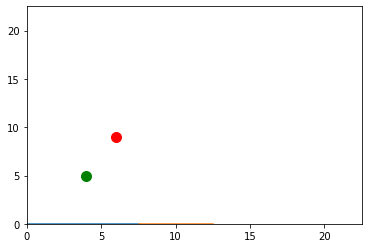

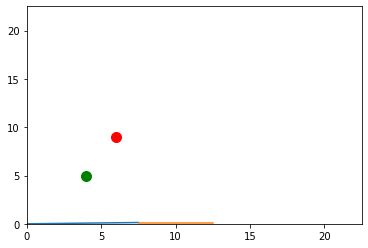

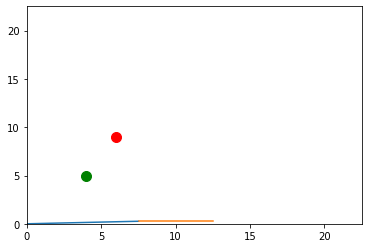

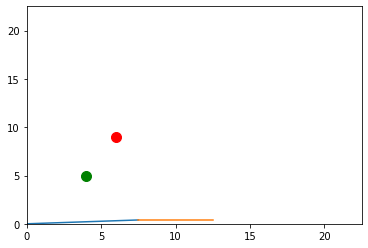

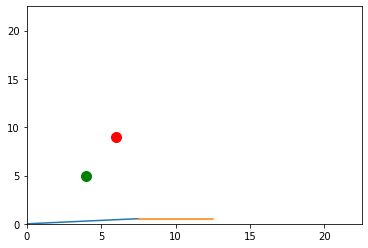

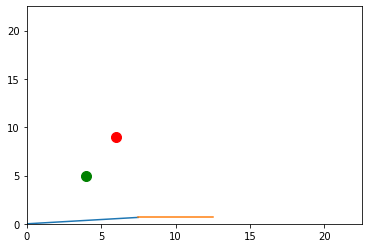

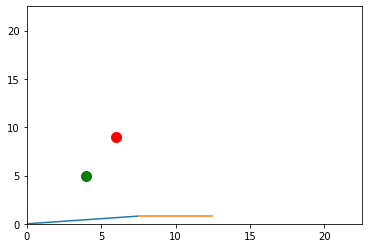

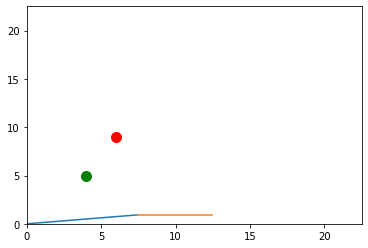

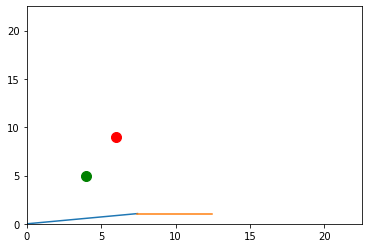

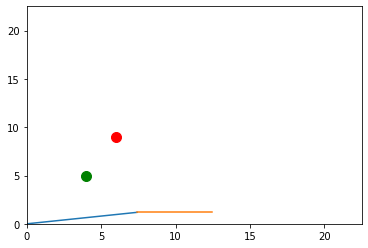

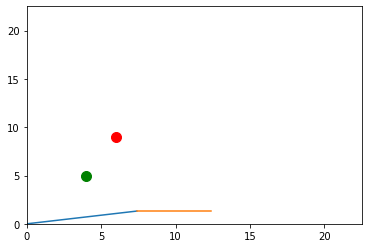

In [14]:
theta1=[]
theta1.append(0)
for i in range(1,11):
    print(pick_pos)
    theta1.append(pick_pos[0]*(i/10))
t2=0
print_L1_movement(theta1,t2,0)

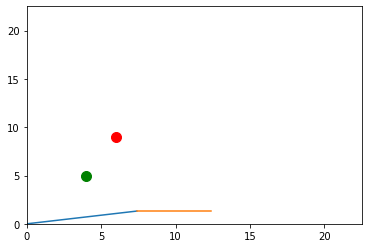

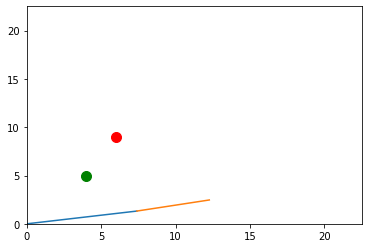

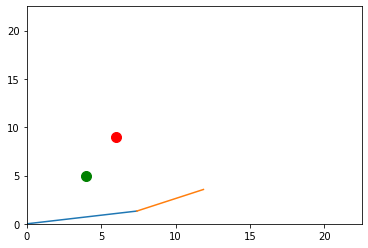

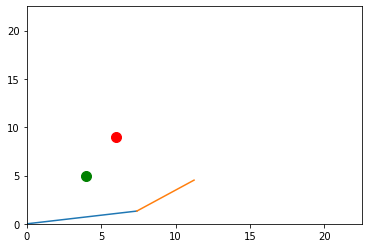

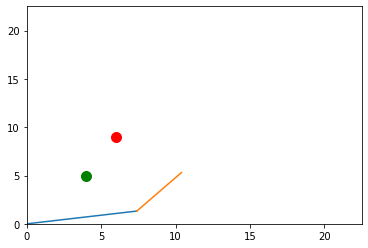

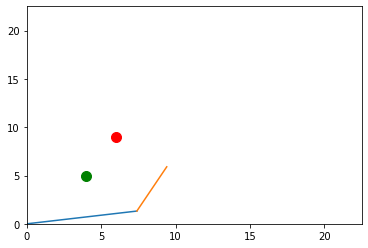

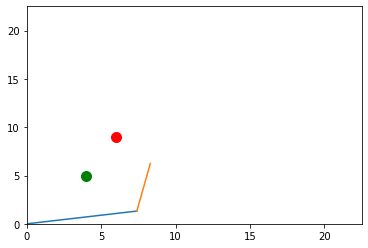

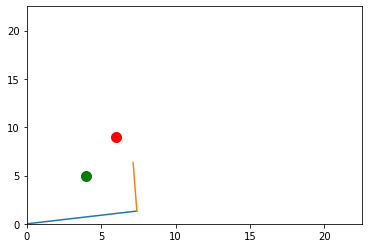

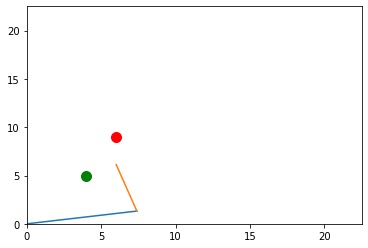

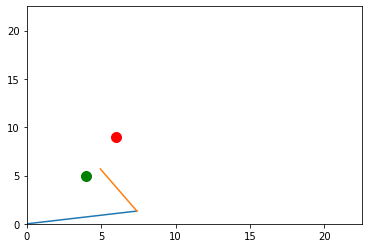

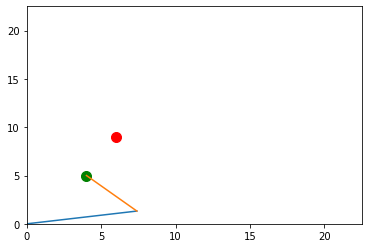

In [15]:
t1=pick_pos[0]
theta2 = []
theta2.append(0)
for i in range(1,11):
    theta2.append(pick_pos[1]*(i/10))
print_L2_movement(theta2,t1,0)



In [16]:
# to find all position inclinations of place position

a1, a2 = symbols('a1,a2')
  
eq1 = Eq((L1*cos(a1)+L2*cos(a2)), xplace)
# print("Equation 1:", eq1)

eq2 = Eq((L1*sin(a1)+L2*sin(a2)), yplace)
# print(eq2)

try:
    val1=solve([eq1, eq2], a1, a2)
    
    print("Posible values of inclination angles are:  ")
    print(val1)
    
except:
    print("Not possible to reach this position. Please re-enter the coordinates")

Posible values of inclination angles are:  
[(0.563341312669380, 1.63997871518284), (1.40224613382528, 0.325608731311815)]


In [17]:
# to find most optimal movement of arm based on previous position

place_pos = find_opt(val1, pick_pos)

Area for (0.563341312669380, 1.63997871518284) is 121.534042812132
Area for (1.40224613382528, 0.325608731311815) is 373.394629374276


In [18]:
print("Best inclination to be followed to place the object:  ", place_pos)

Best inclination to be followed to place the object:   (0.563341312669380, 1.63997871518284)


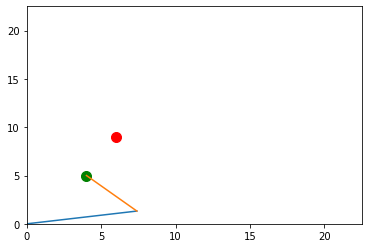

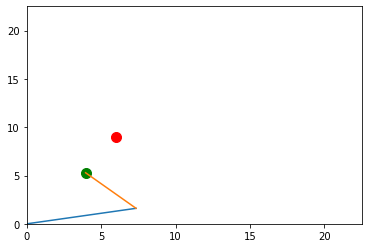

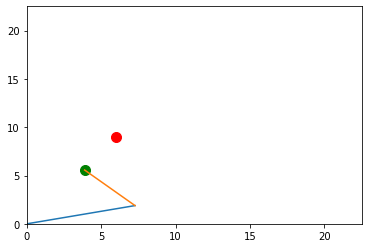

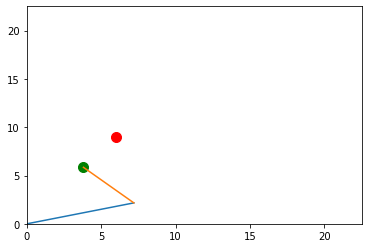

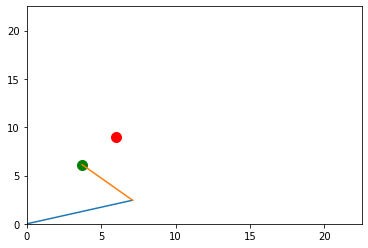

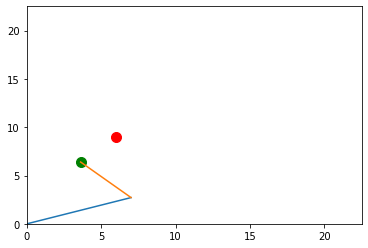

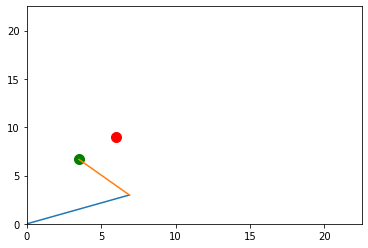

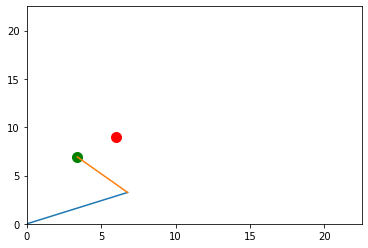

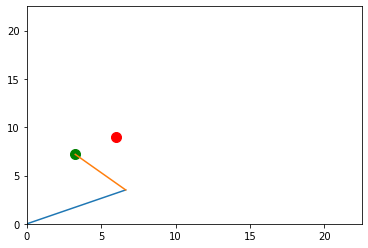

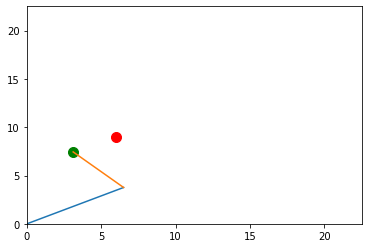

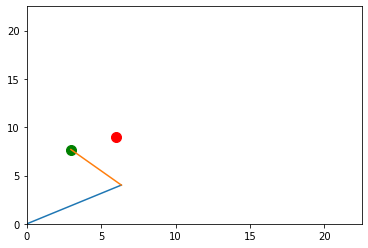

In [19]:
# movement of L1 from pick position to place position

# theta3 = [pick_pos[0], (pick_pos[0]+place_pos[0])/2, place_pos[0]]
theta3 = []
theta3.append(pick_pos[0])
for i in range (1 , 11):
    theta3.append((pick_pos[0])+(place_pos[0]-pick_pos[0])*(i/10))
# theta3.append(place_pos[0])
t4=pick_pos[1]

print_L1_movement(theta3,t4,1)

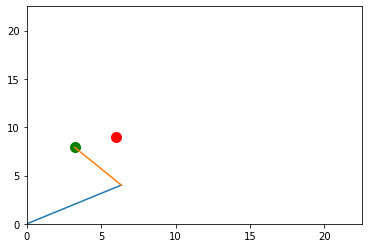

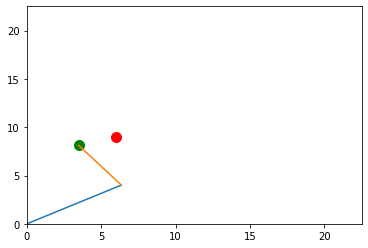

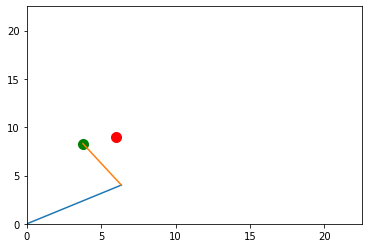

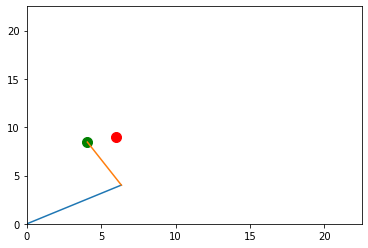

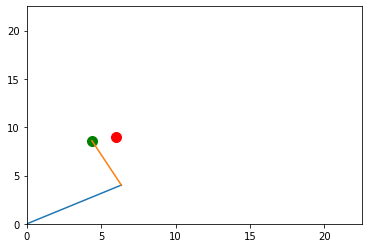

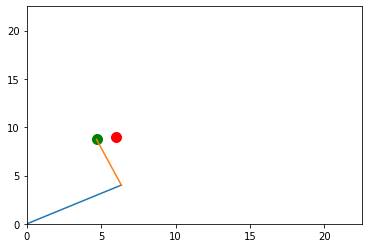

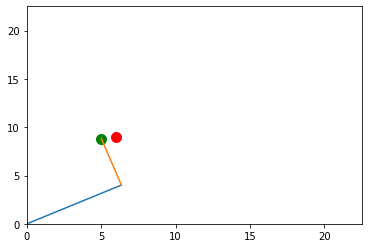

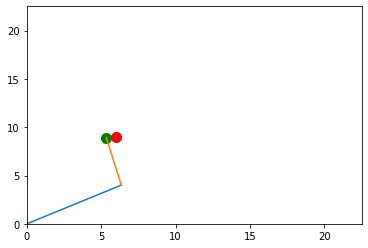

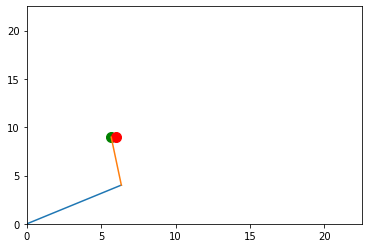

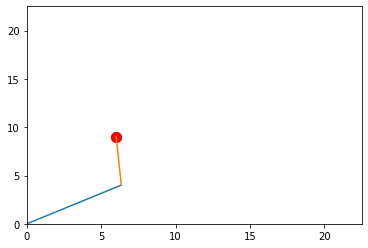

In [20]:
# movement of L2 from pick position to place position

# theta4 = [pick_pos[1], (pick_pos[1]+place_pos[1])/2, place_pos[1]]
t3=place_pos[0]
theta4 = []
# theta4.append(pick_pos[1])
for i in range (1 , 11):
    theta4.append(pick_pos[1]+(place_pos[1]-pick_pos[1])*(i/10))
# theta4.append(place_pos[1])

print_L2_movement(theta4,t3,1)

In [31]:
import glob
from PIL import Image,ImageDraw

# Create the frames
x = []
# imgs = glob.glob("*.jpg")

# imgs.sort()
# print(imgs)
for i in range(1,44):
    new_frame = Image.open(str(i)+'.jpg')
    x.append(new_frame)
    
for i in range(1,7):
    new_frame = Image.open(str(43)+'.jpg')
    x.append(new_frame)
x[0].save('png_to_gif.gif', format='GIF',append_images=x[1:],save_all=True,duration=200, loop=0)